In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 不显示等级2以下的提示信息
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
import pathlib

data_dir = r"/home/zhangyouan/桌面/zya/dataset/681/srp/RockSecissorsPaper_enlarge/train"
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.bmp')) + list(data_dir.glob('*/*.jpg')))
print(image_count)


1221


In [4]:
rock_dir = os.path.join(r'/home/zhangyouan/桌面/zya/dataset/681/srp/RockSecissorsPaper_enlarge/train/rock')
paper_dir = os.path.join(r'/home/zhangyouan/桌面/zya/dataset/681/srp/RockSecissorsPaper_enlarge/train/paper')
scissors_dir = os.path.join(r'/home/zhangyouan/桌面/zya/dataset/681/srp/RockSecissorsPaper_enlarge/train/scissors')

['240119_173321_00058.jpg', 'cesun21_rock_.bmp', 'hsv22_rock_.bmp']
['brightnessE21_paper_.bmp', 'flip26_paper_.bmp', '240119_174000_00204.jpg']
['240119_174207_00048.jpg', '240119_174343_00147.jpg', 'cesun12_scissors_.bmp']


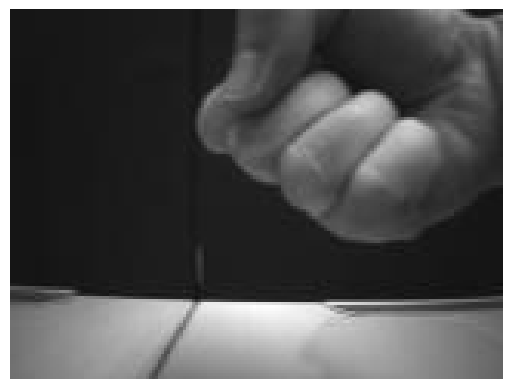

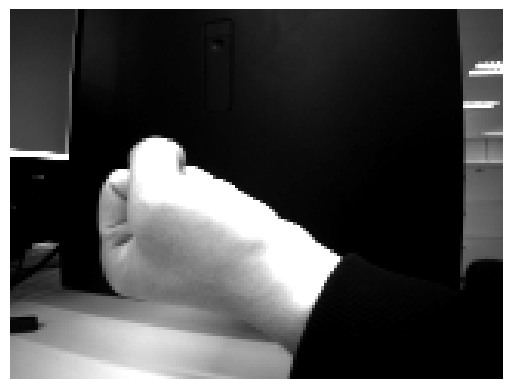

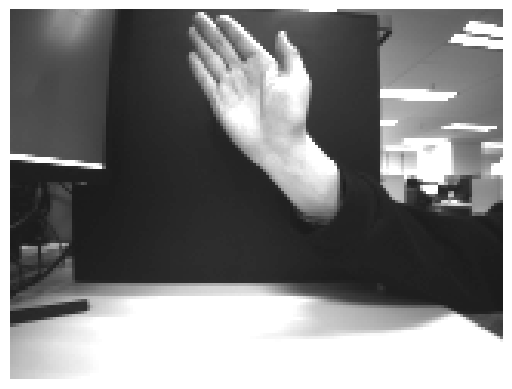

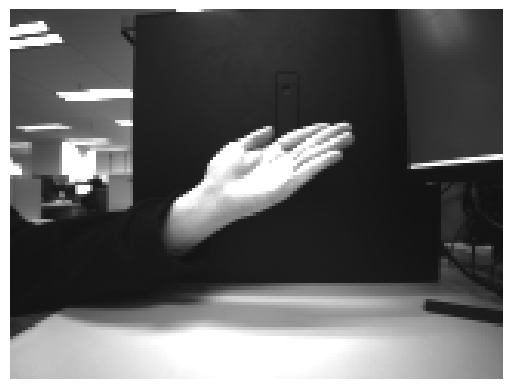

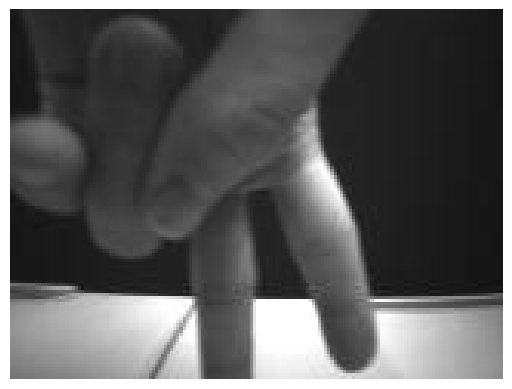

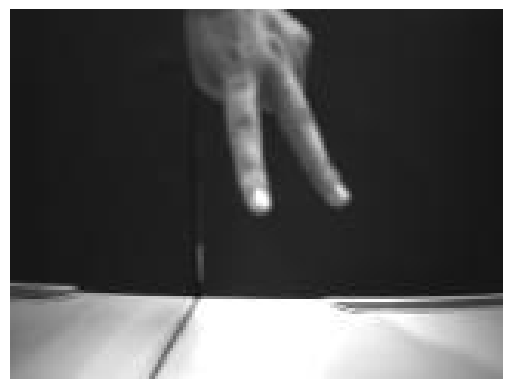

In [5]:
rock_files = os.listdir(rock_dir)
print(rock_files[:3])
 
paper_files = os.listdir(paper_dir)
print(paper_files[:3])
 
scissors_files = os.listdir(scissors_dir)
print(scissors_files[:3])
 
pic_index = 2
next_rock = [os.path.join(rock_dir, fname)
             for fname in rock_files[pic_index - 2:pic_index]
             ]
next_paper = [os.path.join(paper_dir, fname)
             for fname in paper_files[pic_index - 2:pic_index]
             ]
next_scissors = [os.path.join(scissors_dir, fname)
             for fname in scissors_files[pic_index - 2:pic_index]
             ]

import cv2 
for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    img = mpimg.imread(img_path)
    # 将BGR转换为RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 不显示等级2以下的提示信息
 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
 
 
training_datagen = ImageDataGenerator(
    # 数据增强
    rescale=1. / 255,
    rotation_range=40, # 旋转范围
    width_shift_range=0.2, # 宽平移
    height_shift_range=0.2,# 高平移
    shear_range=0.2, # 剪切
    zoom_range=0.2, # 缩放
    horizontal_flip=True,
    fill_mode='nearest'
    
)
 
validation_datagen = ImageDataGenerator(
    rescale=1. / 255,
)

 
TRAINING_DIR = r'/home/zhangyouan/桌面/zya/dataset/681/srp/RockSecissorsPaper_enlarge/train/'
training_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (120, 160),
    color_mode="grayscale",
    class_mode = 'categorical'
)
 
VALIDATION_DIR = r'/home/zhangyouan/桌面/zya/dataset/681/srp/RockSecissorsPaper_enlarge/val/'
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (120, 160),
    color_mode="grayscale",
    class_mode = 'categorical'
)


Found 1221 images belonging to 3 classes.
Found 57 images belonging to 3 classes.


In [7]:
#======== 模型构建 =========
model = tf.keras.models.Sequential([
    # model 1
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (120, 160, 1)), # 输入参数：过滤器数量，过滤器尺寸，激活函数：relu， 输入图像尺寸
    tf.keras.layers.MaxPooling2D(2, 2), # 池化：增强特征
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'), # 输入参数：过滤器数量、过滤器尺寸、激活函数：relu
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'), # 输入参数：过滤器数量、过滤器尺寸、激活函数：relu
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'), # 输入参数：过滤器数量、过滤器尺寸、激活函数：relu
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'), # 输入参数：过滤器数量、过滤器尺寸、激活函数：relu
    # tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'), # 输入参数：过滤器数量、过滤器尺寸、激活函数：relu
    # tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),  # 输入参数：过滤器数量、过滤器尺寸、激活函数：relu
    # tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),  # 输入参数：过滤器数量、过滤器尺寸、激活函数：relu
    # tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(), # 输入层
    # tf.keras.layers.Dense(1, activation = 'relu'), # 全连接隐层 神经元数量：128 ，激活函数：relu
    tf.keras.layers.Dense(3, activation = 'softmax') # 英文字母分类 26 ，阿拉伯数字分类 10  输出用的是softmax 概率化函数 使得所有输出加起来为1 0-1之间
])
 
model.summary()
 
#======== 模型参数编译 =========
model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy', # 损失函数： 稀疏的交叉熵 binary_crossentropy
    metrics = ['accuracy']
)
model.load_weights(r"20240122_model.h5")

from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)
#======== 模型训练 =========
# Note that this may take some time.
history = model.fit(
    training_generator,
    epochs = 500,
    validation_data = validation_generator,
    callbacks=[early_stopping, reduce_lr],
)

model.save('20240122_model_2.h5') # model 保存


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 158, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 79, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 77, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 38, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 36, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 18, 32)        0

/home/zhangyouan/anaconda3/envs/stc/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


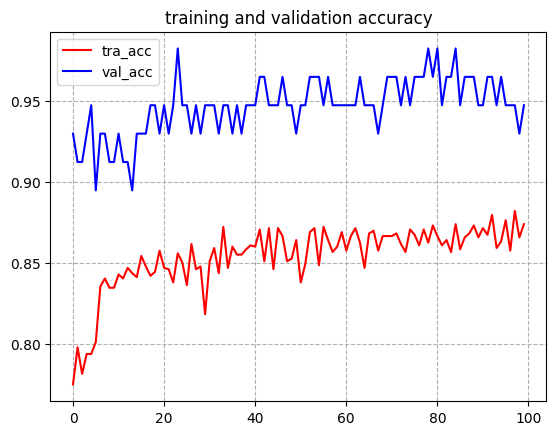

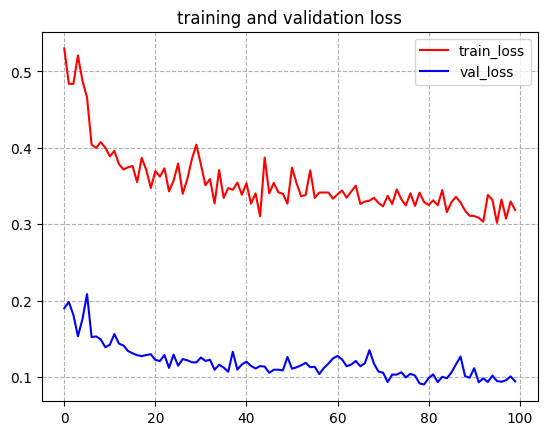

In [8]:
 
#-----------------------------------------------------------
# Retrieve a list of list result on training and test data
# set for each training epoch
#-----------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc)) # Get number of epochs
 
#-----------------------------------------------------------
# Plot training and validation accuracy per epoch
#-----------------------------------------------------------
plt.plot(epochs, acc, 'r', label = "tra_acc")
plt.plot(epochs ,val_acc, 'b', label = "val_acc")
plt.title("training and validation accuracy")
plt.legend(loc=0)
plt.grid(ls='--')  # 生成网格
plt.show()
# 曲线呈直线是因为epochs/轮次太少
#-----------------------------------------------------------
# Plot training and validation loss per epoch
#-----------------------------------------------------------
plt.plot(epochs, loss, 'r', label = "train_loss")
plt.plot(epochs ,val_loss, 'b', label = "val_loss")
plt.title("training and validation loss")
plt.legend(loc=0)
plt.grid(ls='--')  # 生成网格
plt.show()
# 曲线呈直线是因为epochs/轮次太少


In [87]:
# 简单的量化尝试；
# import tensorflow as tf 
 
# model = tf.keras.models.load_model('./class_08_test_model.h5')
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
 
# # 开启动态量化
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# # converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
# tflite_model = converter.convert()
# open("./class_08_test_model_quant.tflite", "wb").write(tflite_model)

In [9]:
import numpy as np
x = training_generator.next()

print(len(x))
print(len(x[0]))
print(len(x[0][0]))
print(len(x[0][0][0]))
print(len(x[0][0][0][0]))

y = np.array(x[0])
print(type(y))
print(type(y[0]))
print(np.shape(y))

2
32
120
160
1
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(32, 120, 160, 1)


# int8 量化

In [11]:
import tensorflow as tf


def representative_data_gen():
    for input_value in tf.data.Dataset.from_tensor_slices(y).batch(1).take(100):
        yield [input_value]


model = tf.keras.models.load_model('/home/zhangyouan/桌面/zya/NN_net/network/SSD/IMX_681_ssd_mobilenet_git/keras/classification/20240122_rock_paper_scissors/20240122_model_loss_0.3186_acc_0.8739.h5')
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_type = tf.int8
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

tflite_model = converter.convert()

# tflite_model.summary()
# Save the model.
with open(r'/home/zhangyouan/桌面/zya/NN_net/network/SSD/IMX_681_ssd_mobilenet_git/keras/classification/20240122_rock_paper_scissors/20240122_model_loss_0.3186_acc_0.8739.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp55ildexz/assets


INFO:tensorflow:Assets written to: /tmp/tmp55ildexz/assets
/home/zhangyouan/anaconda3/envs/stc/lib/python3.10/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
fully_quantize: 0, inference_type: 6, input_inference_type: INT8, output_inference_type: INT8


# uint8 量化

In [90]:
def representative_data_gen():
    for input_value in tf.data.Dataset.from_tensor_slices(y).batch(1).take(100):
        yield [input_value]

        
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_type = tf.uint8
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model = converter.convert()

# Save the model.
with open('./class_08_test_model_uint8_quant.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpgzt3c6jc/assets


INFO:tensorflow:Assets written to: /tmp/tmpgzt3c6jc/assets


In [91]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

input:  <class 'numpy.uint8'>
output:  <class 'numpy.uint8'>


In [95]:
model = tf.keras.models.load_model('./class_08_test_model.h5')

def representative_data_gen():
    for input_value in tf.data.Dataset.from_tensor_slices(y).batch(1).take(100):
        yield [input_value]

        
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.allow_custom_ops = True

converter.inference_type = tf.uint8
# input_arrays = converter.get_input_arrays()
# converter.quantized_input_stats = {input_arrays[0]:(127.5, 127.5)}
# converter.default_ranges_stats = (0, 255)

converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model = converter.convert()

# Save the model.
with open('./class_08_test_model_uint8_quant.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpmblmjl7j/assets


INFO:tensorflow:Assets written to: /tmp/tmpmblmjl7j/assets


ValueError: The inference_input_type and inference_output_type must be tf.float32.